<a href="https://colab.research.google.com/github/Chetan3794/Netflix-Movies-and-TV-shows-clustering/blob/main/netflix_recommendation_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [ ]:

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch
import matplotlib.cm as cm

In [ ]:
#loading dataset
in_data = pd.read_csv('NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [ ]:
#Display the FIRST 5 Observations
print('First 5 Observation')
print(in_data.head())

First 5 Observation
  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-1

In [ ]:
#Display the LAST 5 Observations
print('Last 5 Observation')
print(in_data.tail())

Last 5 Observation
     show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2

In [ ]:
#displays the first five rows of the dataframe by default
in_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
# removes the rows that contains NULL values.
in_data.dropna(subset=['date_added'],inplace=True)

In [ ]:
# removes the rows that contains NULL values.
in_data.dropna(subset=['rating'],inplace=True)

In [ ]:
#droping director column
in_data.drop(['director'],axis=1,inplace=True)

In [ ]:
#handling null values
in_data['cast'].fillna(value='No cast', inplace=True)
in_data['country'].fillna(value=in_data['country'].mode()[0],inplace=True)



In [ ]:
in_data.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
#convert date time format
in_data["date_added"]=pd.to_datetime(in_data["date_added"])
in_data['year_added']=in_data['date_added'].dt.year
in_data['month_added']=in_data['date_added'].dt.month
in_data['day_added']=in_data['date_added'].dt.day
in_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7770 non-null   object        
 1   type          7770 non-null   object        
 2   title         7770 non-null   object        
 3   cast          7770 non-null   object        
 4   country       7770 non-null   object        
 5   date_added    7770 non-null   datetime64[ns]
 6   release_year  7770 non-null   int64         
 7   rating        7770 non-null   object        
 8   duration      7770 non-null   object        
 9   listed_in     7770 non-null   object        
 10  description   7770 non-null   object        
 11  year_added    7770 non-null   int64         
 12  month_added   7770 non-null   int64         
 13  day_added     7770 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(9)
memory usage: 910.5+ KB


In [ ]:
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
in_data['target_ages'] = in_data['rating'].replace(ratings)

In [ ]:
# type should be a category
in_data['type'] = pd.Categorical(in_data['type'])

# target_ages is another category (4 classes)
in_data['target_ages'] = pd.Categorical(in_data['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

In [ ]:
in_data.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,target_ages
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,Adults
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,Adults
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,Adults
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,Teens
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1,Teens


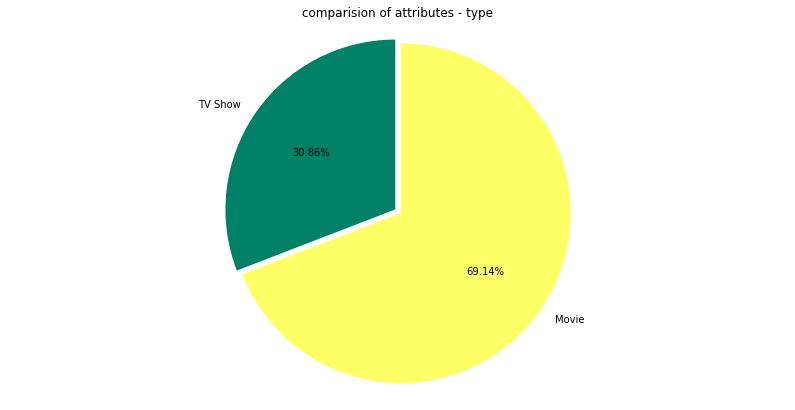

In [ ]:
#feature tv show & movie pie chart
plt.figure(figsize=(14, 7))
labels=['TV Show', 'Movie']
colors = plt.cm.summer(np.linspace(0, 1, 2))
plt.pie(in_data['type'].value_counts().sort_values(),labels=labels,colors= colors, explode=[0.02,0.02],
        autopct='%1.2f%%', startangle=90)
plt.title('comparision of attributes - type')
plt.axis('equal')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Rating')

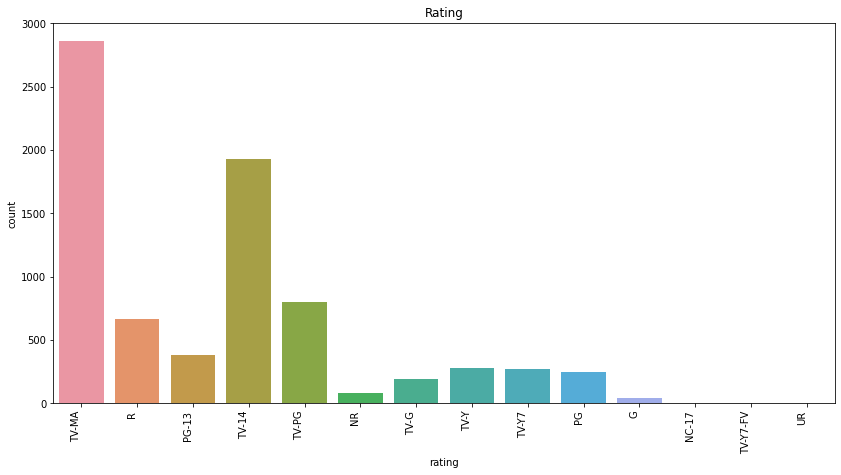

In [ ]:
#Ratings 
sns.countplot(in_data['rating'])
sns.countplot(in_data['rating']).set_xticklabels(sns.countplot(in_data['rating']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(14,7)
plt.title('Rating')

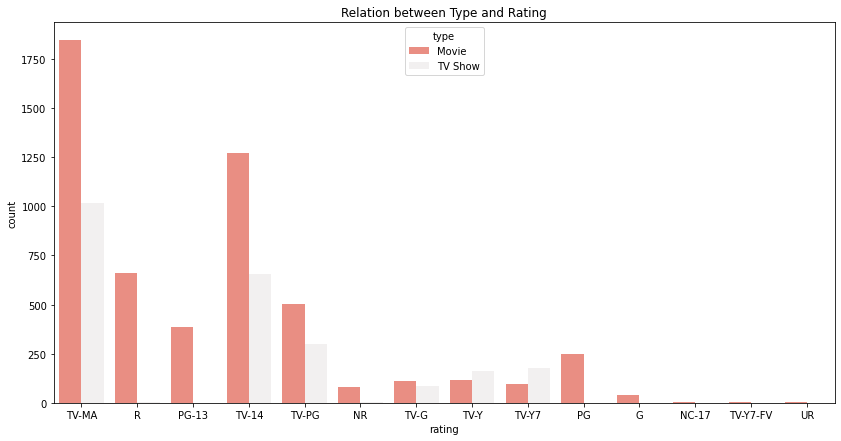

In [ ]:
#Type with Rating
plt.figure(figsize=(14,7))
sns.countplot(x='rating',hue='type',data=in_data, palette='light:salmon_r')
plt.title('Relation between Type and Rating')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


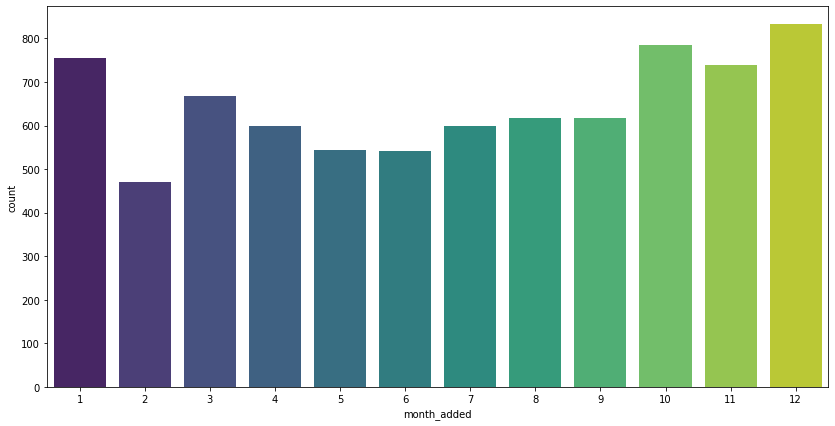

In [ ]:
#  month wise Release of movies
plt.figure(figsize=(14,7))
ax=sns.countplot('month_added',data= in_data , palette='viridis')

In [ ]:
#convert string to integer
in_data['duration']=in_data['duration'].str.replace('Season','')
in_data['duration']=in_data['duration'].str.replace('s','')
in_data['duration']=in_data['duration'].str.replace('min','')

in_data['duration']=in_data['duration'].astype(str).astype(int)
in_data['duration']

0         4
1        93
2        78
3        80
4       123
       ... 
7782     99
7783    111
7784     44
7785      1
7786     90
Name: duration, Length: 7770, dtype: int64

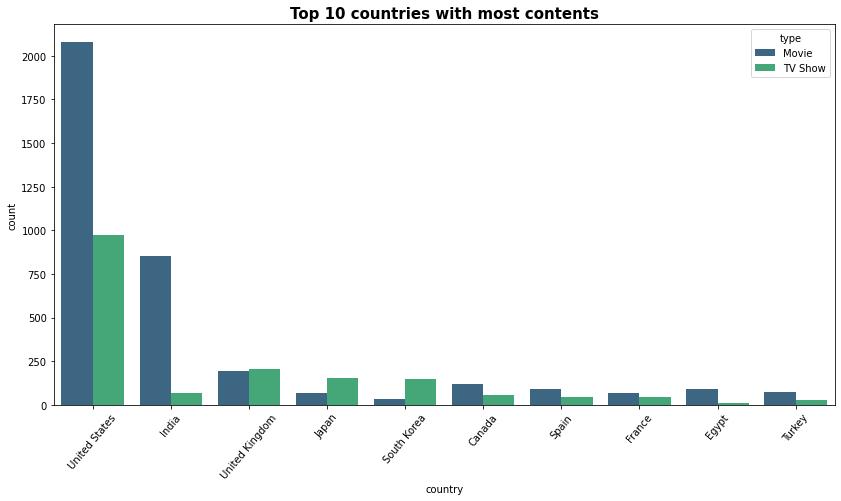

In [ ]:
#Analysing top10 countries with most content 
plt.figure(figsize=(14,7))
sns.countplot(x=in_data['country'],palette="viridis",order=in_data['country'].value_counts().index[0:10],hue=in_data['type'])
plt.xticks(rotation=50)
plt.title('Top 10 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

In [ ]:
#returns the number of unique values for each column
in_data.listed_in.nunique()

491

In [ ]:
#value counts
in_data.listed_in.value_counts().to_frame().T

,Documentaries,Stand-Up Comedy,"Dramas, International Movies","Comedies, Dramas, International Movies","Dramas, Independent Movies, International Movies",Kids' TV,Children & Family Movies,"Documentaries, International Movies","Children & Family Movies, Comedies","Comedies, International Movies",...,"TV Horror, TV Mysteries, Teen TV Shows","Action & Adventure, International Movies, Thrillers","Anime Series, TV Horror, TV Thrillers","Action & Adventure, Faith & Spirituality, Sci-Fi & Fantasy","TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows","Anime Series, Crime TV Shows, TV Thrillers","Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows","Crime TV Shows, International TV Shows, Reality TV","International Movies, Romantic Movies, Sci-Fi & Fantasy","International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows"
listed_in,334,321,320,243,215,204,177,172,169,161,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
in_data.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'day_added', 'target_ages'],
      dtype='object')

In [ ]:
#making categories
categories = ", ".join(in_data['listed_in']).split(", ")
categories[:5]

['International TV Shows',
 'TV Dramas',
 'TV Sci-Fi & Fantasy',
 'Dramas',
 'International Movies']

In [ ]:
len(categories)

17042

In [ ]:
len(set(categories))

42

In [ ]:
category_wise_count = {}
for category in set(categories):
  category_wise_count[category] = categories.count(category)

In [ ]:
category_wise_count

{'International Movies': 2437,
 'Sports Movies': 196,
 'TV Mysteries': 90,
 'Action & Adventure': 721,
 'Horror Movies': 312,
 'TV Sci-Fi & Fantasy': 75,
 'TV Action & Adventure': 149,
 'Classic Movies': 103,
 'Teen TV Shows': 60,
 'Cult Movies': 59,
 'Comedies': 1471,
 'Faith & Spirituality': 57,
 'Romantic Movies': 531,
 'Movies': 52,
 'TV Thrillers': 50,
 'Classic & Cult TV': 25,
 'Korean TV Shows': 150,
 'Sci-Fi & Fantasy': 218,
 'Dramas': 2105,
 'Spanish-Language TV Shows': 146,
 'TV Shows': 12,
 'TV Horror': 69,
 'Children & Family Movies': 532,
 'Romantic TV Shows': 333,
 'Thrillers': 491,
 'Anime Series': 146,
 'Science & Nature TV': 85,
 "Kids' TV": 411,
 'Reality TV': 222,
 'Docuseries': 352,
 'International TV Shows': 1197,
 'Documentaries': 786,
 'Crime TV Shows': 426,
 'TV Dramas': 703,
 'Music & Musicals': 321,
 'Independent Movies': 673,
 'Anime Features': 57,
 'Stand-Up Comedy': 329,
 'LGBTQ Movies': 90,
 'Stand-Up Comedy & Talk Shows': 52,
 'TV Comedies': 517,
 'Britis

In [ ]:
#sorting category wise count by value
sorted_category_wise_count = sorted(category_wise_count.items(), key=lambda x: x[1])
sorted_category_wise_count[:4]

[('TV Shows', 12),
 ('Classic & Cult TV', 25),
 ('TV Thrillers', 50),
 ('Movies', 52)]

In [ ]:
#Top 10 most occurred category
top_10_most_occurred_categories = sorted_category_wise_count[-10:]
top_10_most_occurred_categories

[('Romantic Movies', 531),
 ('Children & Family Movies', 532),
 ('Independent Movies', 673),
 ('TV Dramas', 703),
 ('Action & Adventure', 721),
 ('Documentaries', 786),
 ('International TV Shows', 1197),
 ('Comedies', 1471),
 ('Dramas', 2105),
 ('International Movies', 2437)]

In [ ]:
#datatype
type(in_data.listed_in.iloc[0])

str

In [ ]:
(in_data.listed_in.iloc[0])

'International TV Shows, TV Dramas, TV Sci-Fi & Fantasy'

In [ ]:
(in_data.listed_in.iloc[0]).split(",")

['International TV Shows', ' TV Dramas', ' TV Sci-Fi & Fantasy']

In [ ]:
len((in_data.listed_in.iloc[0]).split(","))

3

In [ ]:
no_of_category = []
for categories in in_data.listed_in.values:
  len_categories = len(categories.split(","))
  no_of_category.append(len_categories)
#creating new column
in_data['no_of_category'] = no_of_category
in_data.no_of_category.unique()

array([3, 2, 1])

In [ ]:
in_data.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'day_added', 'target_ages',
       'no_of_category'],
      dtype='object')

In [ ]:
in_data.description.iloc[0]



'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

In [ ]:
First_des = in_data.description.iloc[0]
First_des

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

In [ ]:
#download nltk
import nltk 
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [ ]:
#removing punctuation
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
in_data['description'] = in_data['description'].apply(remove_punctuation)
in_data.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,target_ages,no_of_category
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,Adults,3
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,Adults,2
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies",When an army recruit is found dead his fellow ...,2018,12,20,Adults,2
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",In a postapocalyptic world ragdoll robots hide...,2017,11,16,Teens,3
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become cardcount...,2020,1,1,Teens,1


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# extracting the stopwords from nltk library
sw = nltk.corpus.stopwords.words('english')
# displaying the stopwords
for i in sw:
  print(i , end=',  ')

i,  me,  my,  myself,  we,  our,  ours,  ourselves,  you,  you're,  you've,  you'll,  you'd,  your,  yours,  yourself,  yourselves,  he,  him,  his,  himself,  she,  she's,  her,  hers,  herself,  it,  it's,  its,  itself,  they,  them,  their,  theirs,  themselves,  what,  which,  who,  whom,  this,  that,  that'll,  these,  those,  am,  is,  are,  was,  were,  be,  been,  being,  have,  has,  had,  having,  do,  does,  did,  doing,  a,  an,  the,  and,  but,  if,  or,  because,  as,  until,  while,  of,  at,  by,  for,  with,  about,  against,  between,  into,  through,  during,  before,  after,  above,  below,  to,  from,  up,  down,  in,  out,  on,  off,  over,  under,  again,  further,  then,  once,  here,  there,  when,  where,  why,  how,  all,  any,  both,  each,  few,  more,  most,  other,  some,  such,  no,  nor,  not,  only,  own,  same,  so,  than,  too,  very,  s,  t,  can,  will,  just,  don,  don't,  should,  should've,  now,  d,  ll,  m,  o,  re,  ve,  y,  ain,  aren,  

In [ ]:
print("Number of stopwords in english : ", len(sw))

Number of stopwords in english :  179


In [ ]:
#removing stopwords
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    #Method 1
    text1 = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text1)

In [ ]:
in_data['description'] = in_data['description'].apply( remove_stopwords )
in_data.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,target_ages,no_of_category
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",future elite inhabit island paradise far crowd...,2020,8,14,Adults,3
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",devastating earthquake hits mexico city trappe...,2016,12,23,Adults,2
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies",army recruit found dead fellow soldiers forced...,2018,12,20,Adults,2
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalyptic world ragdoll robots hide fear...,2017,11,16,Teens,3
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,brilliant group students become cardcounting e...,2020,1,1,Teens,1


In [ ]:
#used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(in_data['description'])
# Collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [ ]:
dictionary

dict_items([('future', 7149), ('elite', 5638), ('inhabit', 8940), ('island', 9216), ('paradise', 12662), ('far', 6394), ('crowded', 4228), ('slums', 16080), ('get', 7345), ('one', 12291), ('chance', 3059), ('join', 9434), ('saved', 15184), ('squalor', 16495), ('devastating', 4822), ('earthquake', 5487), ('hits', 8301), ('mexico', 11093), ('city', 3325), ('trapped', 17897), ('survivors', 17043), ('walks', 18855), ('life', 10163), ('wait', 18832), ('rescued', 14501), ('trying', 18039), ('desperately', 4775), ('stay', 16604), ('alive', 781), ('army', 1222), ('recruit', 14221), ('found', 6933), ('dead', 4489), ('fellow', 6520), ('soldiers', 16205), ('forced', 6869), ('confront', 3778), ('terrifying', 17419), ('secret', 15372), ('thats', 17473), ('haunting', 8006), ('jungle', 9529), ('training', 17854), ('camp', 2750), ('postapocalyptic', 13341), ('world', 19292), ('ragdoll', 13940), ('robots', 14827), ('hide', 8181), ('fear', 6473), ('dangerous', 4416), ('machines', 10520), ('exterminate',

In [ ]:
vocab = [ ]
count_of_vocab = []
for key , value in dictionary:
  vocab.append( key )
  count_of_vocab.append( value )

In [ ]:
# Store the count in panadas dataframe with vocab as index
vocab_before_stemming = pd.DataFrame({"Word": vocab ,
                                      "count" :count_of_vocab})
# Sort the dataframe
vocab_before_stemming = vocab_before_stemming.sort_values("count" ,ascending=False)

In [ ]:
vocab_before_stemming.head(4)

,Word,count
18845,şeref,19585
10379,ōarai,19584
12367,łukasz,19583
11090,überelite,19582


In [ ]:
vocab_before_stemming.head(20).T

,18845,10379,12367,11090,11662,13273,6576,18183,10417,9859,19547,6528,19582,16402,7184,18385,19572,19579,10282,18059
Word,şeref,ōarai,łukasz,überelite,über,ömer,émile,ángel,álvaro,álex,zé,zurich,zumbo,zulu,zuhu,zuckerberg,zoé,zozo,zoya,zorro
count,19585,19584,19583,19582,19581,19580,19579,19578,19577,19576,19575,19574,19573,19572,19571,19570,19569,19568,19567,19566


In [ ]:
# Create an object of stemming function
stemmer = SnowballStemmer("english")

In [ ]:
def Apply_stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [ ]:
#Stemming for description
in_data['description'] = in_data['description'].apply( Apply_stemming )
in_data.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,target_ages,no_of_category
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",futur elit inhabit island paradis far crowd sl...,2020,8,14,Adults,3
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",devast earthquak hit mexico citi trap survivor...,2016,12,23,Adults,2
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies",armi recruit found dead fellow soldier forc co...,2018,12,20,Adults,2
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalypt world ragdol robot hide fear dan...,2017,11,16,Teens,3
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,brilliant group student becom cardcount expert...,2020,1,1,Teens,1


In [ ]:
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(in_data['description'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [ ]:
# Lists to store the vocab and counts
vocab = []
count_of_vocab = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count_of_vocab.append(value)

In [ ]:
# Creating new dataframe vocab_after_stemming
# Store the count in panadas dataframe with vocab as index
vocab_after_stemming = pd.DataFrame({"Word": vocab ,
                                      "count" :count_of_vocab})
# Sort the dataframe
vocab_after_stemming = vocab_after_stemming.sort_values("count" ,ascending=False)

In [ ]:
#Adding a new column length which contains length of description
in_data['Length_des'] = in_data['description'].apply(lambda x: len(x))

In [ ]:
in_data.head(3)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,target_ages,no_of_category,Length_des
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",futur elit inhabit island paradis far crowd sl...,2020,8,14,Adults,3,82
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",devast earthquak hit mexico citi trap survivor...,2016,12,23,Adults,2,88
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies",armi recruit found dead fellow soldier forc co...,2018,12,20,Adults,2,102


In [ ]:
in_data.description.iloc[0]

'futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalor'

In [ ]:
len(in_data.description.iloc[0])

82

In [ ]:
in_data.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'day_added', 'target_ages',
       'no_of_category', 'Length_des'],
      dtype='object')

In [ ]:
# listed_in remove punctuation
in_data['listed_in'] = in_data['listed_in'].apply(remove_punctuation)
in_data.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,target_ages,no_of_category,Length_des
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,International TV Shows TV Dramas TV SciFi Fan...,futur elit inhabit island paradis far crowd sl...,2020,8,14,Adults,3,82
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,Dramas International Movies,devast earthquak hit mexico citi trap survivor...,2016,12,23,Adults,2,88
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,Horror Movies International Movies,armi recruit found dead fellow soldier forc co...,2018,12,20,Adults,2,102
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,Action Adventure Independent Movies SciFi Fa...,postapocalypt world ragdol robot hide fear dan...,2017,11,16,Teens,3,89
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,brilliant group student becom cardcount expert...,2020,1,1,Teens,1,99


In [ ]:
#Remove stopwords for listed_in
in_data['listed_in'] = in_data['listed_in'].apply( remove_stopwords )
in_data.head( 2 )

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,target_ages,no_of_category,Length_des
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,international tv shows tv dramas tv scifi fantasy,futur elit inhabit island paradis far crowd sl...,2020,8,14,Adults,3,82
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,dramas international movies,devast earthquak hit mexico citi trap survivor...,2016,12,23,Adults,2,88


In [ ]:
#Using CountVectorizer() to count vocabulary items
# Create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(in_data['listed_in'])
# Collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [ ]:
dictionary

dict_items([('international', 19), ('tv', 41), ('shows', 33), ('dramas', 12), ('scifi', 31), ('fantasy', 15), ('movies', 23), ('horror', 17), ('action', 0), ('adventure', 1), ('independent', 18), ('mysteries', 26), ('thrillers', 40), ('crime', 8), ('docuseries', 11), ('documentaries', 10), ('sports', 36), ('comedies', 6), ('anime', 2), ('series', 32), ('reality', 28), ('romantic', 29), ('science', 30), ('nature', 27), ('british', 3), ('korean', 21), ('music', 24), ('musicals', 25), ('lgbtq', 22), ('faith', 13), ('spirituality', 35), ('kids', 20), ('spanishlanguage', 34), ('children', 4), ('family', 14), ('classic', 5), ('cult', 9), ('standup', 37), ('comedy', 7), ('talk', 38), ('teen', 39), ('features', 16)])

In [ ]:
vocab = [ ]
count_of_vocab = []
for key , value in dictionary:
  vocab.append( key )
  count_of_vocab.append( value )

In [ ]:
listed_in_vocab_before_stem = pd.DataFrame({"Word": vocab , "count" :count_of_vocab})

listed_in_vocab_before_stem = listed_in_vocab_before_stem.sort_values("count" ,ascending=False)

In [ ]:
#Stemming for description
in_data['listed_in'] = in_data['listed_in'].apply( Apply_stemming )
in_data.head(3)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,target_ages,no_of_category,Length_des
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,intern tv show tv drama tv scifi fantasi,futur elit inhabit island paradis far crowd sl...,2020,8,14,Adults,3,82
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,drama intern movi,devast earthquak hit mexico citi trap survivor...,2016,12,23,Adults,2,88
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,horror movi intern movi,armi recruit found dead fellow soldier forc co...,2018,12,20,Adults,2,102


In [ ]:
#TfidfVectorizer (after stemming)
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(in_data['listed_in'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [ ]:
dictionary

dict_items([('intern', 18), ('tv', 39), ('show', 31), ('drama', 11), ('scifi', 29), ('fantasi', 14), ('movi', 22), ('horror', 16), ('action', 0), ('adventur', 1), ('independ', 17), ('mysteri', 24), ('thriller', 38), ('crime', 7), ('docuseri', 10), ('documentari', 9), ('sport', 34), ('comedi', 6), ('anim', 2), ('seri', 30), ('realiti', 26), ('romant', 27), ('scienc', 28), ('natur', 25), ('british', 3), ('korean', 20), ('music', 23), ('lgbtq', 21), ('faith', 12), ('spiritu', 33), ('kid', 19), ('spanishlanguag', 32), ('children', 4), ('famili', 13), ('classic', 5), ('cult', 8), ('standup', 35), ('talk', 36), ('teen', 37), ('featur', 15)])

In [ ]:
# Lists to store the vocab and counts
vocab = []
count_of_vocab = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count_of_vocab.append(value)

In [ ]:
#Adding a new column length_lis which will contain length of listed_in
in_data['Length_lis'] = in_data['listed_in'].apply(lambda x: len(x))
in_data.head(3)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,target_ages,no_of_category,Length_des,Length_lis
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,intern tv show tv drama tv scifi fantasi,futur elit inhabit island paradis far crowd sl...,2020,8,14,Adults,3,82,40
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,drama intern movi,devast earthquak hit mexico citi trap survivor...,2016,12,23,Adults,2,88,17
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,horror movi intern movi,armi recruit found dead fellow soldier forc co...,2018,12,20,Adults,2,102,23


In [ ]:
in_data[['description', 'Length_des', 'listed_in' ,'Length_lis' ]].head(3)

,description,Length_des,listed_in,Length_lis
0,futur elit inhabit island paradis far crowd sl...,82,intern tv show tv drama tv scifi fantasi,40
1,devast earthquak hit mexico citi trap survivor...,88,drama intern movi,17
2,armi recruit found dead fellow soldier forc co...,102,horror movi intern movi,23


In [ ]:
in_data.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'day_added', 'target_ages',
       'no_of_category', 'Length_des', 'Length_lis'],
      dtype='object')

In [ ]:
X_variable = in_data[['no_of_category' ,'Length_des','Length_lis']]
stdscaler = preprocessing.StandardScaler()

In [ ]:
X_variable.describe()

,no_of_category,Length_des,Length_lis
count,7770.000000,7770.000000,7770.000000
mean,2.193308,93.012484,24.342085
std,0.785836,10.775430,10.677661
min,1.000000,25.000000,4.000000
25%,2.000000,87.000000,17.000000
50%,2.000000,93.000000,24.000000
75%,3.000000,100.000000,32.000000
max,3.000000,185.000000,62.000000


In [ ]:
X_rescale=stdscaler.fit_transform(X_variable)
X=X_rescale
silhouette_score_ = [  ]
range_n_clusters = [i for i in range(2,16)]

In [ ]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    silhouette_score_.append([int(n_clusters) , round(score , 3)])
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4282857929737575
For n_clusters = 3, silhouette score is 0.3832991558393045
For n_clusters = 4, silhouette score is 0.37431547662296216
For n_clusters = 5, silhouette score is 0.3720928519862943
For n_clusters = 6, silhouette score is 0.3682182150716806
For n_clusters = 7, silhouette score is 0.3760715548670699
For n_clusters = 8, silhouette score is 0.37023226557085526
For n_clusters = 9, silhouette score is 0.37457468830999086
For n_clusters = 10, silhouette score is 0.36280921094026963
For n_clusters = 11, silhouette score is 0.35862093876952916
For n_clusters = 12, silhouette score is 0.3543771242040706
For n_clusters = 13, silhouette score is 0.3494750244313662
For n_clusters = 14, silhouette score is 0.3352231245151029
For n_clusters = 15, silhouette score is 0.34713198709555687


In [ ]:
temp = pd.DataFrame(silhouette_score_ , columns = ["n clusters" , "silhouette score"])
temp = temp.sort_values( "silhouette score" , ascending = False )
temp.head(14)

,n clusters,silhouette score
0,2,0.428
1,3,0.383
5,7,0.376
7,9,0.375
2,4,0.374
3,5,0.372
6,8,0.370
4,6,0.368
8,10,0.363
9,11,0.359


For n_clusters = 2 The average silhouette_score is : 0.42843328899854627
For n_clusters = 3 The average silhouette_score is : 0.3832991558393045
For n_clusters = 4 The average silhouette_score is : 0.37431547662296216
For n_clusters = 5 The average silhouette_score is : 0.3720843918336816
For n_clusters = 6 The average silhouette_score is : 0.3683935727757619
For n_clusters = 7 The average silhouette_score is : 0.3759188611985892
For n_clusters = 8 The average silhouette_score is : 0.3529435800136665
For n_clusters = 9 The average silhouette_score is : 0.37355481904677795
For n_clusters = 10 The average silhouette_score is : 0.36466585189849926
For n_clusters = 11 The average silhouette_score is : 0.3556771542933465
For n_clusters = 12 The average silhouette_score is : 0.354922889695617
For n_clusters = 13 The average silhouette_score is : 0.3510103258811644
For n_clusters = 14 The average silhouette_score is : 0.3479317051389534
For n_clusters = 15 The average silhouette_score is : 0.

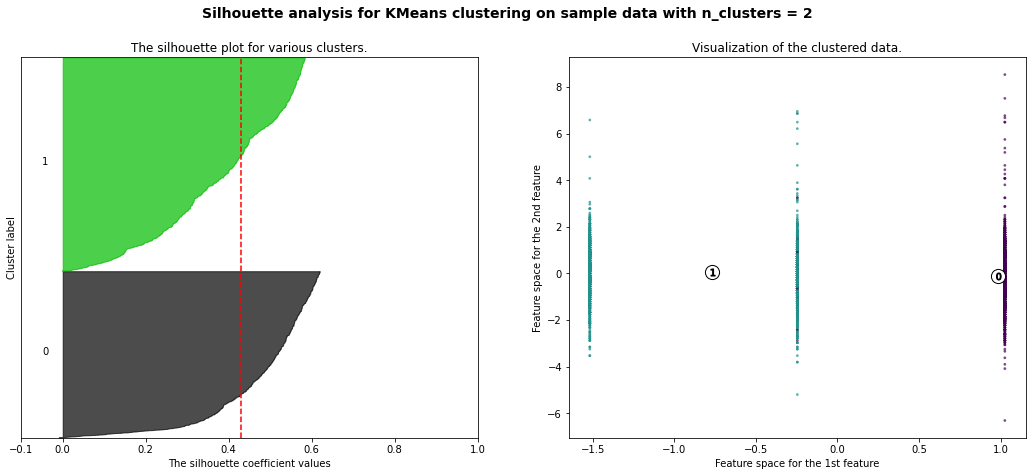

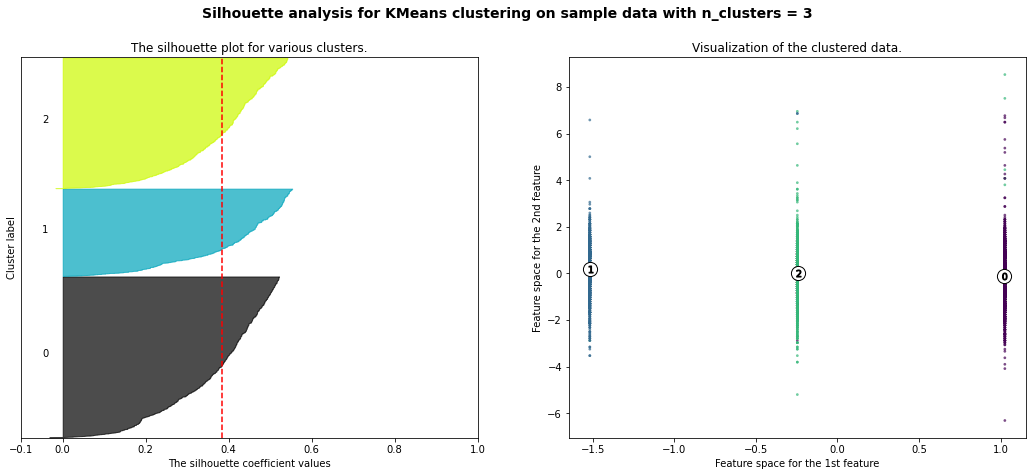

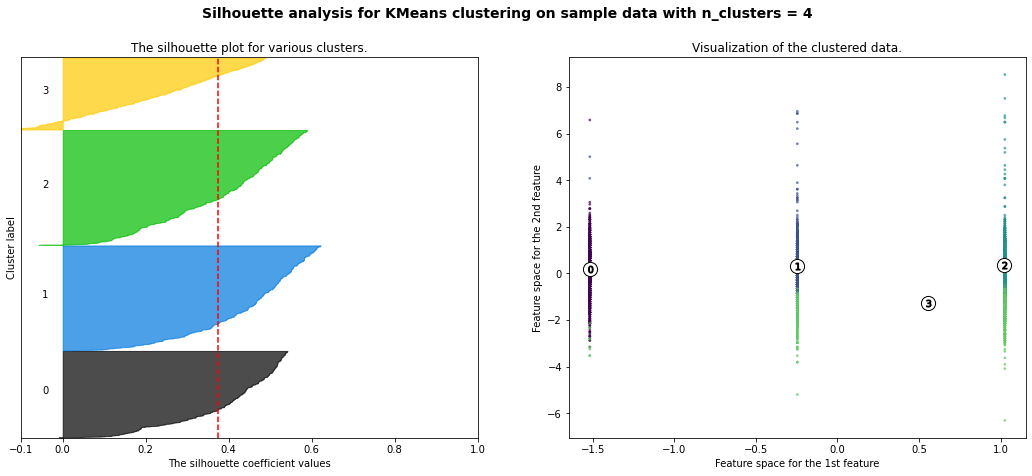

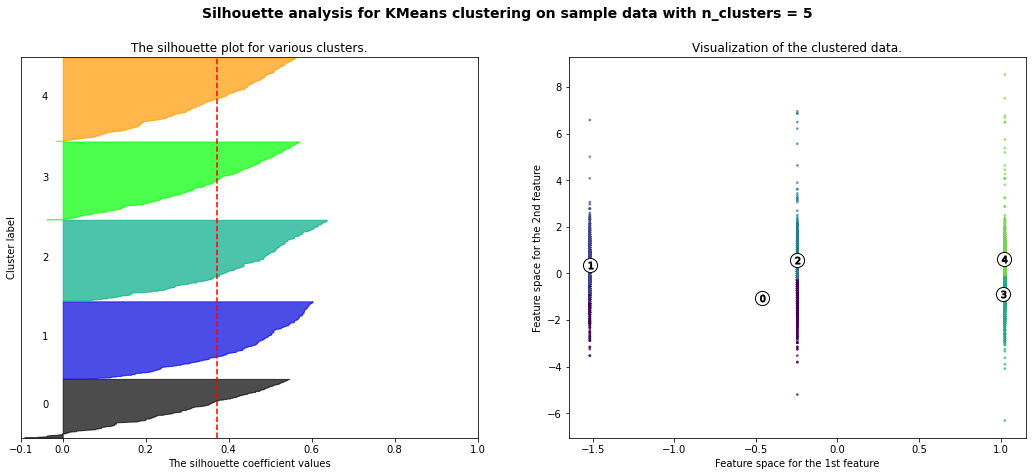

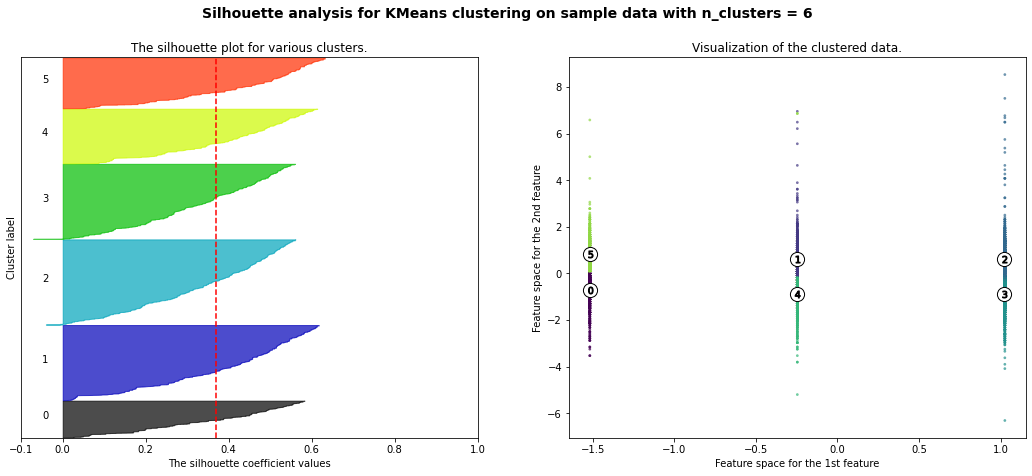

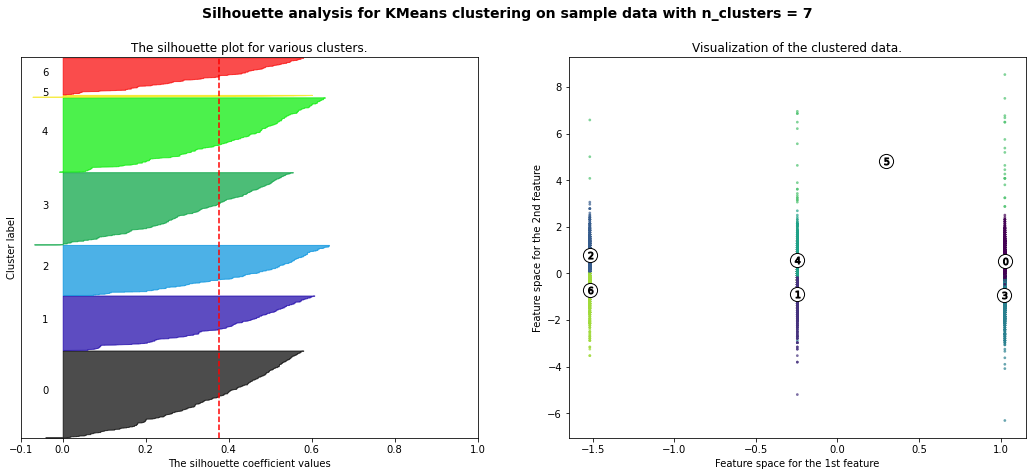

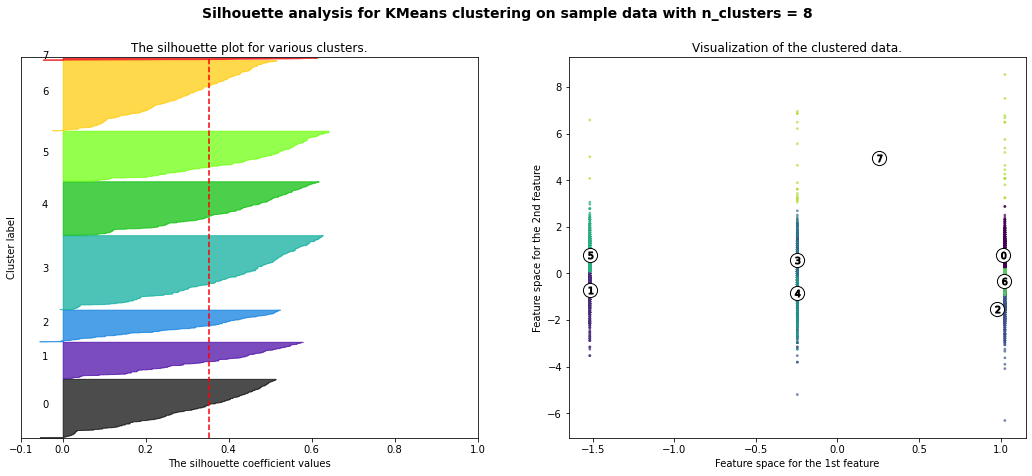

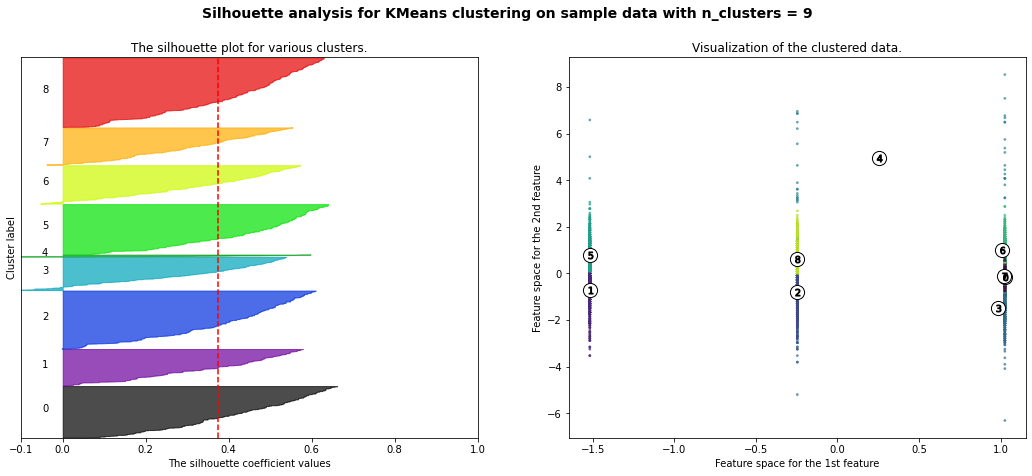

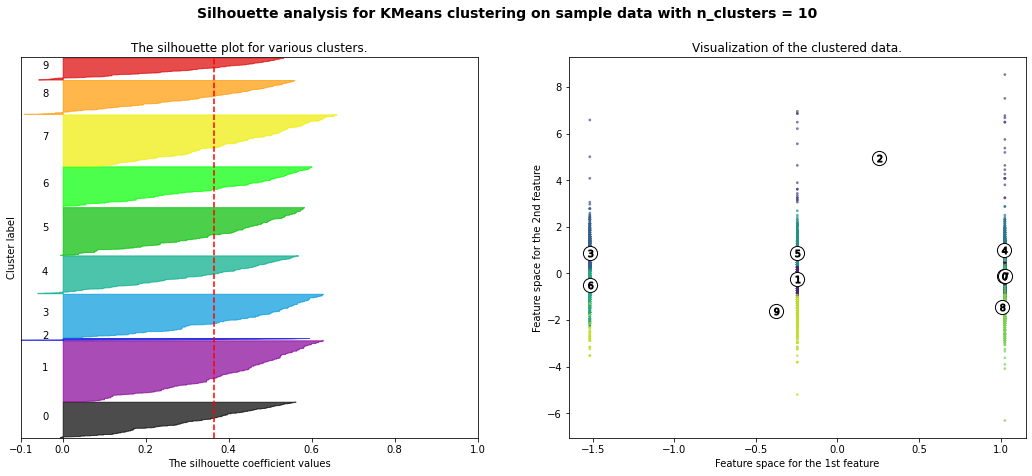

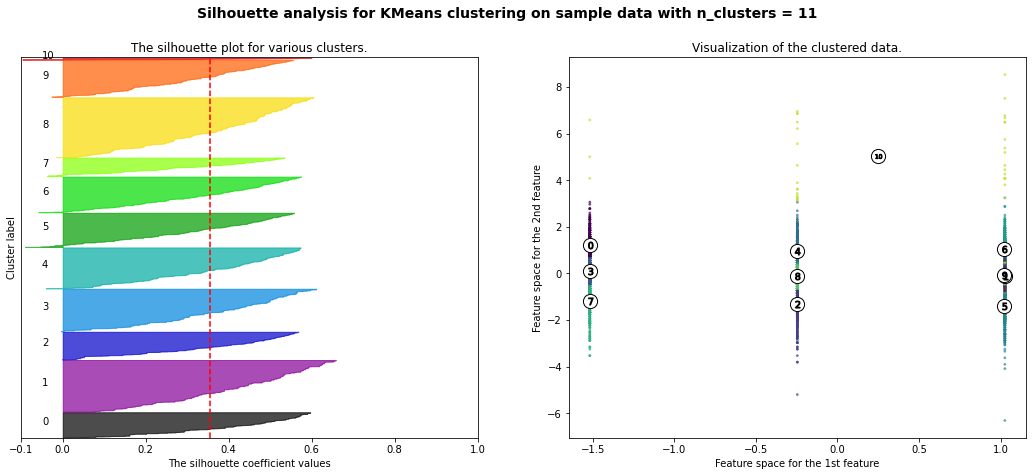

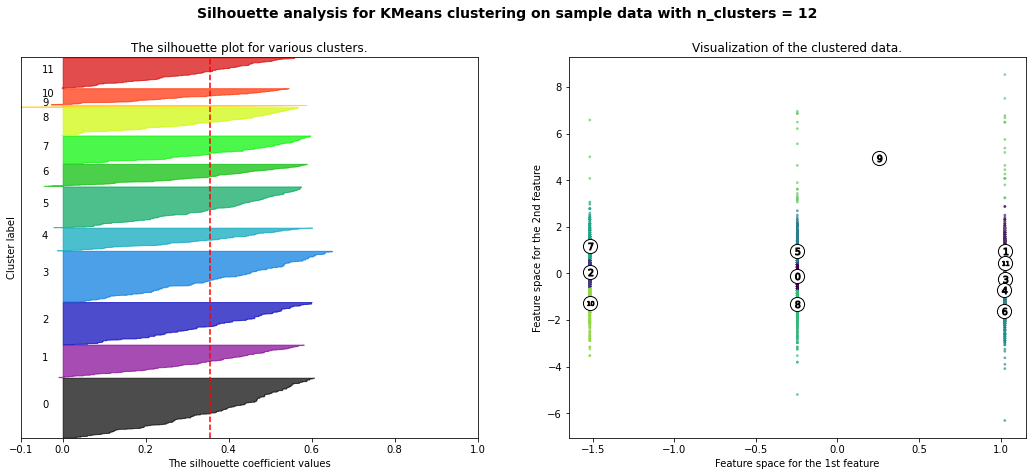

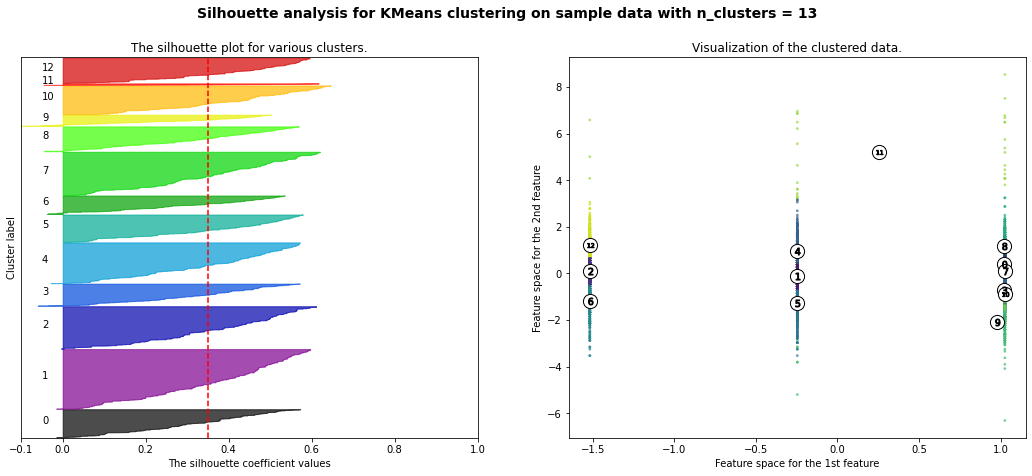

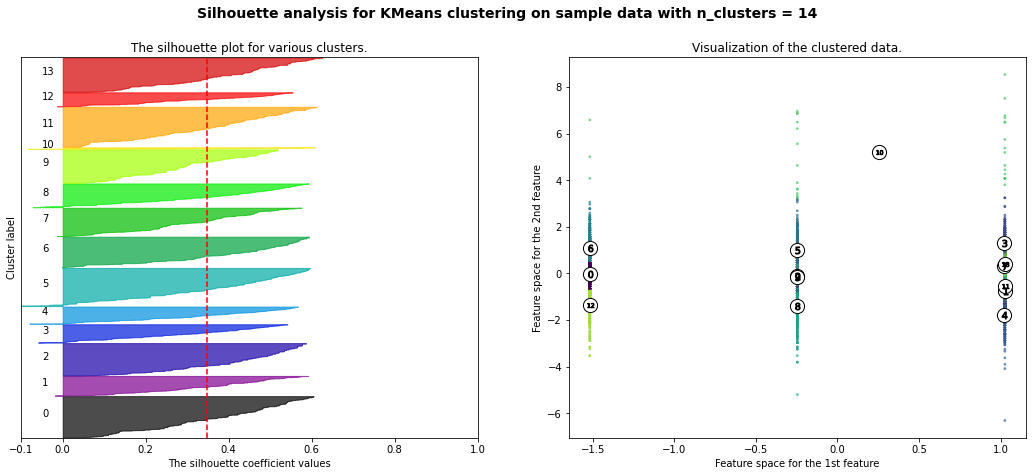

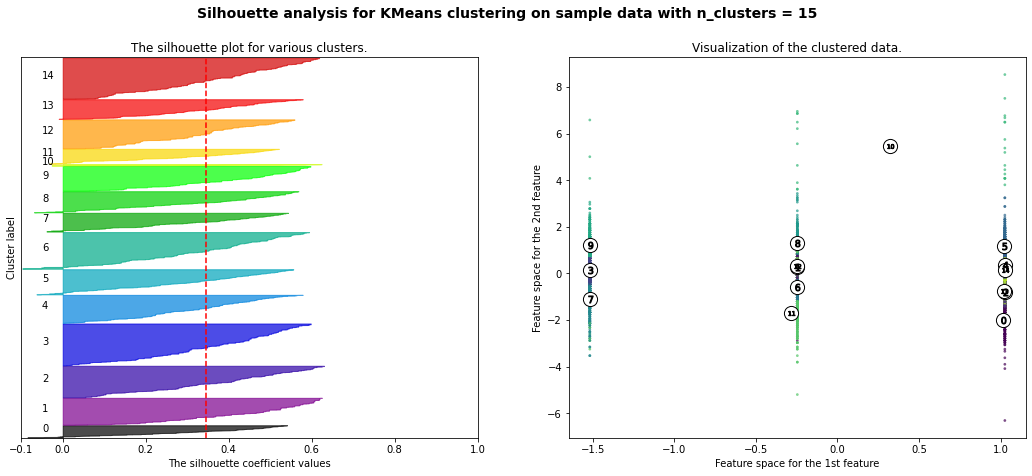

In [ ]:
range_n_clusters = [i for i in range(2,16)]

for n_clusters in range_n_clusters:
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    
    ax1.set_xlim([-0.1, 1])
  
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

   
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

       
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

       
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

   
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
     
     
    colors = cm.viridis(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

   
    centers = clusterer.cluster_centers_
   
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

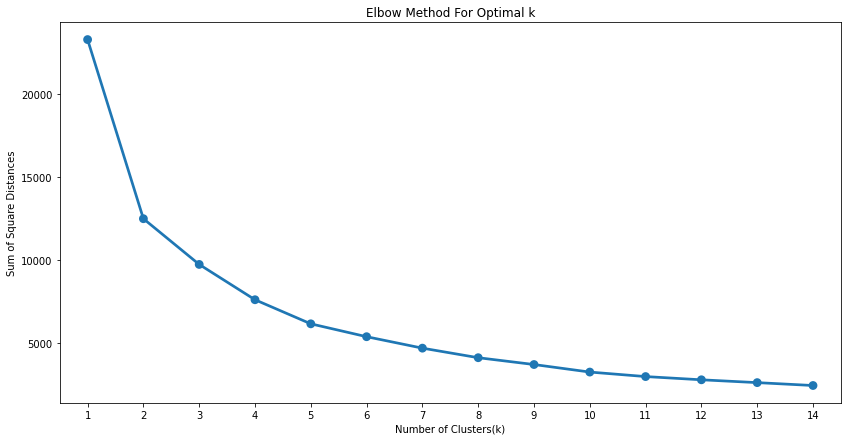

In [ ]:
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(14 , 7))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

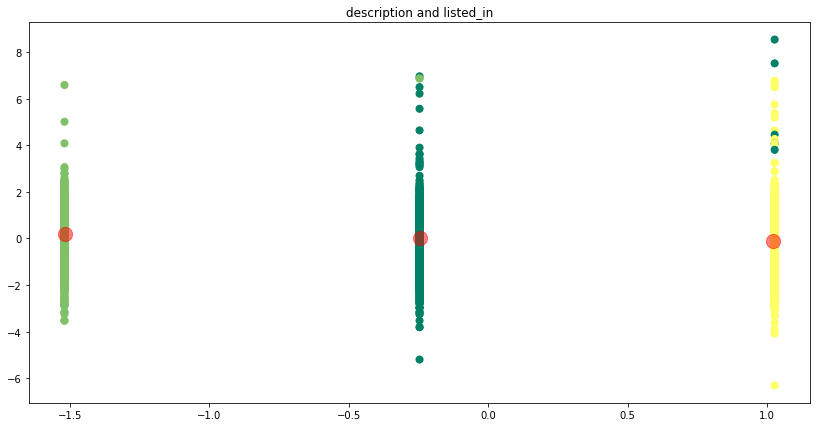

In [ ]:
kmeans = KMeans(n_clusters = 3 )
kmeans.fit(X)
y_kmeans= kmeans.predict(X)
plt.figure(figsize=(14 , 7))
plt.title('description and listed_in')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='summer')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

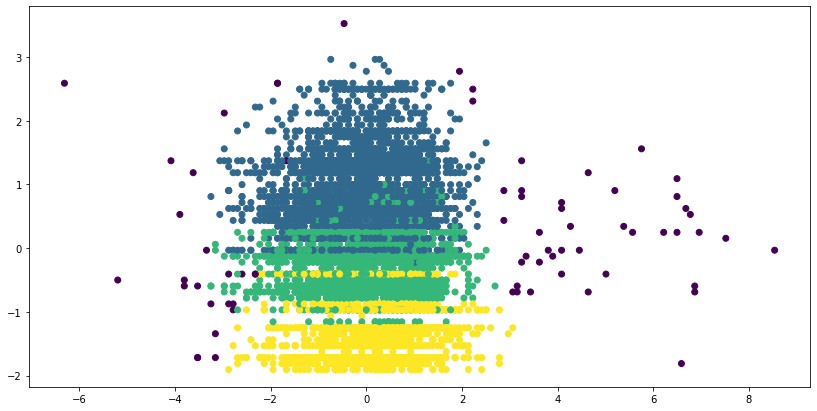

In [ ]:
#DBSCAN
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=( 14 , 7 ))
plt.scatter(X[:,1], X[:,2], c=y_pred)

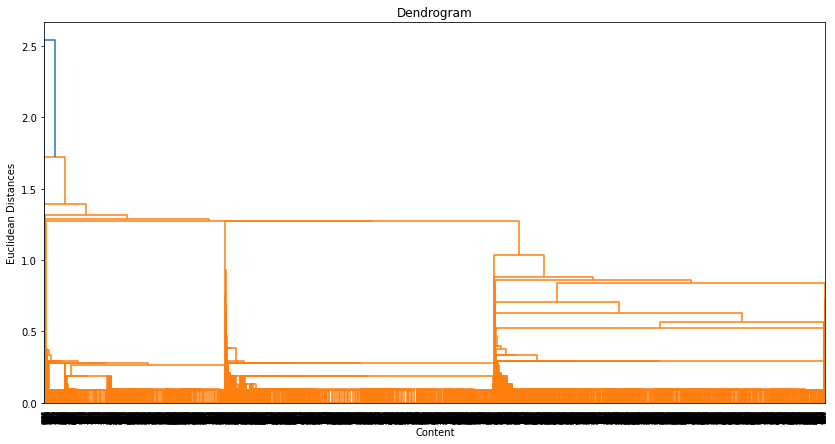

In [ ]:
# Let's dendrogram
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(14,7))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'single'))
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal lin

In [ ]:
# Let's  import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

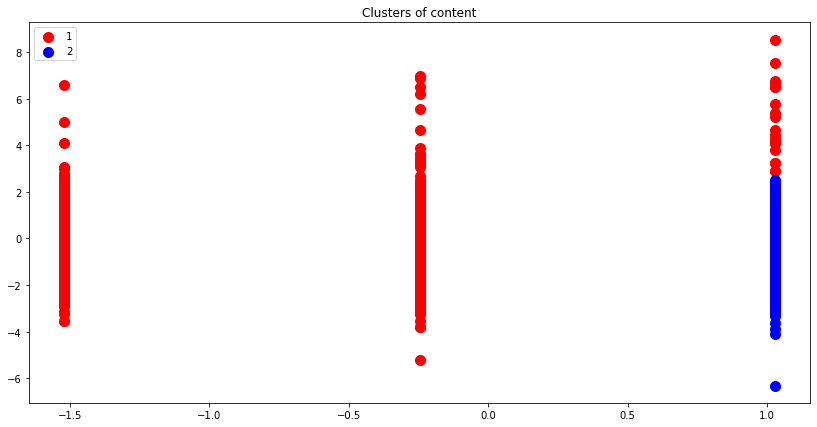

In [ ]:
# Visualizing the clusters (three dimensions only)
plt.figure(figsize=(14,7))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = '1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = '2')


plt.title('Clusters of content')

plt.legend()
plt.show()